In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [3]:
df1 = pd.read_csv("thanjavur_house_prices.csv")
df1.head()

,area_type,availability,location,size,total_sqft,bathroom,balcony,price_per_sqft
0,carpet_area,ready_to_move,Anna_nagar_tnj,10 BHK,2896.0,10,3.0,5180
1,super_area,ready_to_move,pattukottai_tnj,2 BHK,1350.0,2,1.0,4444
2,carpet_area,ready_to_move,madakottai_tnj,3 BHK,2350.0,3,1.0,3617
3,carpet_area,ready_to_move,palliagraharam_tnj,4 BHK,3000.0,4,2.0,4500
4,carpet_area,ready_to_move,boes garden_tnj,2 BHK,1850.0,2,1.0,5135


In [4]:
df1.shape

(599, 8)

In [5]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft',
       'bathroom', 'balcony', 'price_per_sqft'],
      dtype='object')

In [6]:
df1['area_type'].unique()

array(['carpet_area', 'super_area', 'buildup_area', 'super_buildup_area'],
      dtype=object)

In [7]:
df1['area_type'].value_counts()

carpet_area           383
super_area            135
buildup_area           55
super_buildup_area     26
Name: area_type, dtype: int64

In [8]:
df2 = df1.drop(['area_type','balcony','availability'],axis='columns')
df2.shape

(599, 5)

In [9]:
df2.head()

,location,size,total_sqft,bathroom,price_per_sqft
0,Anna_nagar_tnj,10 BHK,2896.0,10,5180
1,pattukottai_tnj,2 BHK,1350.0,2,4444
2,madakottai_tnj,3 BHK,2350.0,3,3617
3,palliagraharam_tnj,4 BHK,3000.0,4,4500
4,boes garden_tnj,2 BHK,1850.0,2,5135


In [10]:
df2.isnull().sum()

location          0
size              0
total_sqft        0
bathroom          0
price_per_sqft    0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location          0
size              0
total_sqft        0
bathroom          0
price_per_sqft    0
dtype: int64

In [12]:
df3['size'].unique()

array(['10 BHK', '2 BHK', '3 BHK', '4 BHK', '9 BHK', '1 BHK', '5 BHK',
       '7 BHK', '6 BHK', '8 BHK'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [14]:
df3.head()

,location,size,total_sqft,bathroom,price_per_sqft,bhk
0,Anna_nagar_tnj,10 BHK,2896.0,10,5180,10
1,pattukottai_tnj,2 BHK,1350.0,2,4444,2
2,madakottai_tnj,3 BHK,2350.0,3,3617,3
3,palliagraharam_tnj,4 BHK,3000.0,4,4500,4
4,boes garden_tnj,2 BHK,1850.0,2,5135,2


In [15]:
df3.bhk.unique()

array([10,  2,  3,  4,  9,  1,  5,  7,  6,  8])

In [16]:
df3.total_sqft.unique()

array([2896.      , 1350.      , 2350.      , 3000.      , 1850.      ,
       6300.      ,  600.      , 1000.      , 1150.      , 4500.      ,
       1800.      , 2341.636364, 2325.909091, 2310.181818, 2294.454545,
       2278.727273, 2263.      , 1500.      , 1900.      , 1650.      ,
       2300.      , 1600.      , 3150.      , 2343.333333, 1750.      ,
       2450.      , 2500.      , 3750.      , 3950.      , 2400.      ,
       1700.      , 1950.      , 1540.      , 1300.      , 2100.      ,
       1290.      , 1620.      , 2770.      , 2210.      , 1910.      ,
       2200.      , 1970.      , 2905.      , 2010.      , 2900.      ,
       1020.      , 2109.      , 2708.      , 2233.      , 2343.      ,
       2190.      , 2333.      , 2990.      , 2409.      , 2345.      ,
       2975.      , 2222.      , 2453.      , 1990.      , 1660.      ,
       4990.      , 2506.      , 3002.      , 2000.      , 1090.      ,
       1909.      , 1890.      , 3004.      , 3200.      , 3988.

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bathroom,price_per_sqft,bhk


In [19]:
df4 = df3.copy()

In [20]:
df4.head()

,location,size,total_sqft,bathroom,price_per_sqft,bhk
0,Anna_nagar_tnj,10 BHK,2896.0,10,5180,10
1,pattukottai_tnj,2 BHK,1350.0,2,4444,2
2,madakottai_tnj,3 BHK,2350.0,3,3617,3
3,palliagraharam_tnj,4 BHK,3000.0,4,4500,4
4,boes garden_tnj,2 BHK,1850.0,2,5135,2


In [22]:
df4['price'] = df4['price_per_sqft']*df4['total_sqft']

In [23]:
df4.head()

,location,size,total_sqft,bathroom,price_per_sqft,bhk,price
0,Anna_nagar_tnj,10 BHK,2896.0,10,5180,10,15001280.0
1,pattukottai_tnj,2 BHK,1350.0,2,4444,2,5999400.0
2,madakottai_tnj,3 BHK,2350.0,3,3617,3,8499950.0
3,palliagraharam_tnj,4 BHK,3000.0,4,4500,4,13500000.0
4,boes garden_tnj,2 BHK,1850.0,2,5135,2,9499750.0


In [24]:
len(df4.location.unique())

23

In [25]:
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Anna_nagar_tnj         73
madakottai_tnj         63
pattukottai_tnj        52
boes garden_tnj        51
palliagraharam_tnj     51
pillaiyar_patti_tnj    43
yagappa_nagar_tnj      41
papanasam_tnj          32
vilar_bypass_tnj       32
rahman_nagar_tnj       31
manojipatti_tnj        21
kannannagar_tnj        11
oldhousingunit_tnj     11
balajinagar_tnj        11
rrnagar_tnj            11
south_rampet_tnj       11
muncipalcolony_tnj     11
ganapathinagar_tnj     10
mangalapuram_tnj       10
eswarinagar_tnj        10
vasthasavadi_tnj        9
RMScolony_tnj           2
ammampet_tnj            2
Name: location, dtype: int64

In [26]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

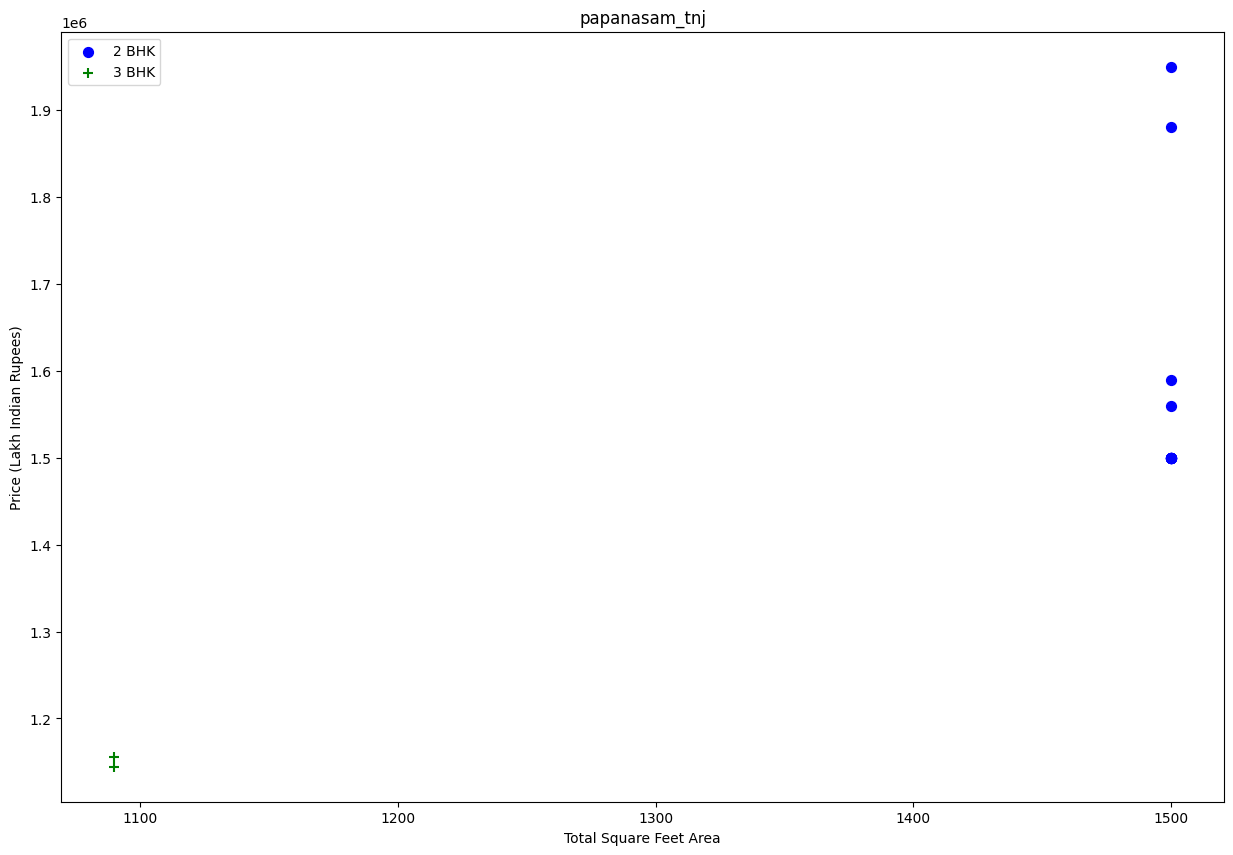

In [27]:
plot_scatter_chart(df4,"papanasam_tnj")

Text(0, 0.5, 'Count')

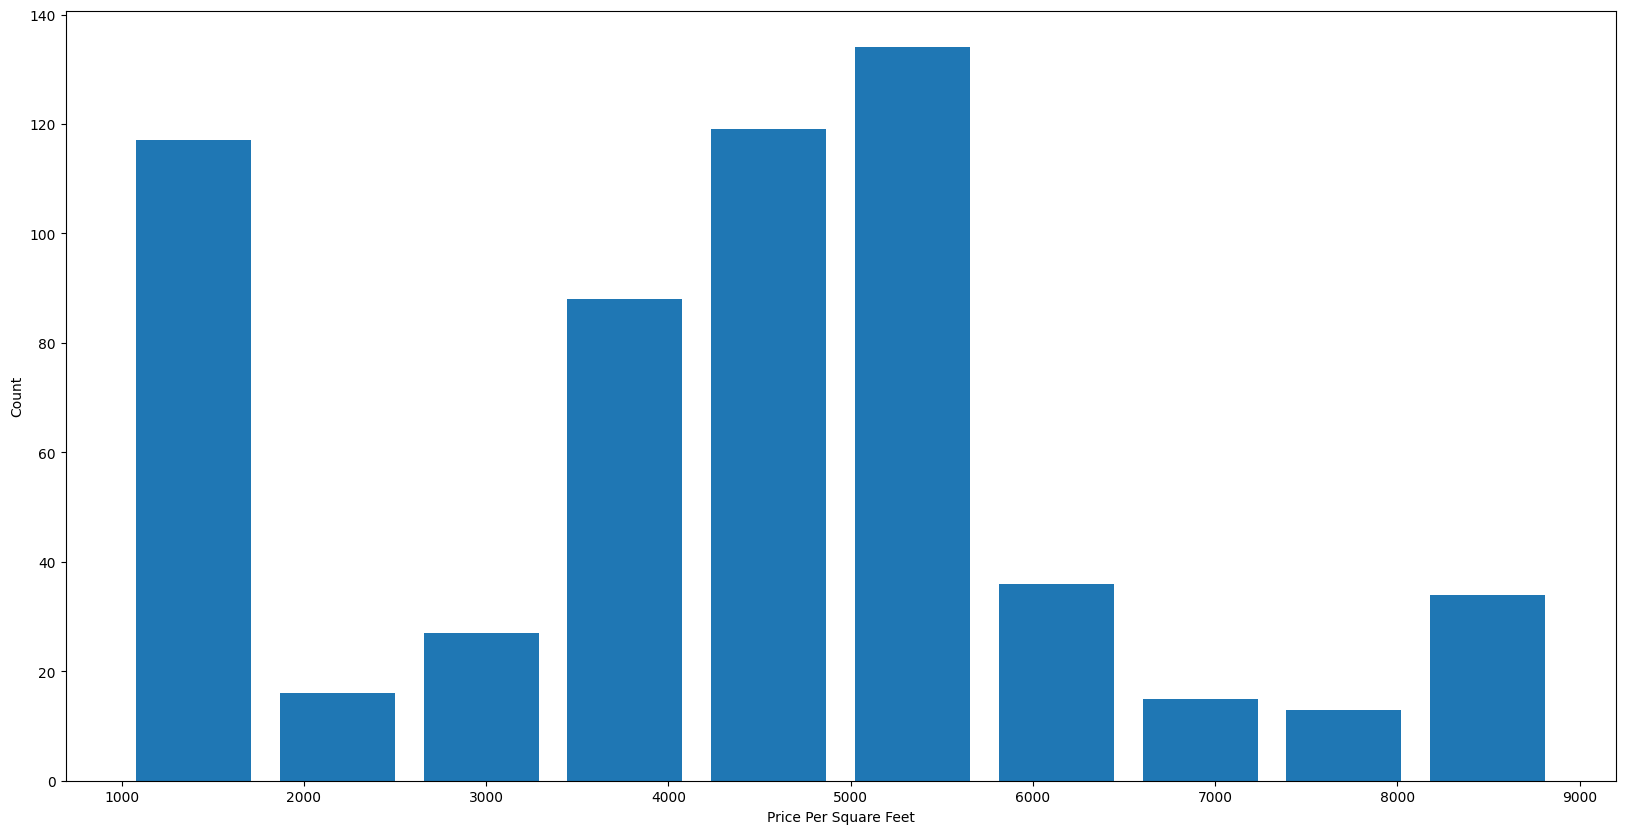

In [29]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [30]:
df4.bathroom.unique()

array([10,  2,  3,  4,  5,  1,  6,  7,  8,  9])

In [31]:
df5 = df4.drop(['size','price_per_sqft'],axis='columns')
df5.head(3)

,location,total_sqft,bathroom,bhk,price
0,Anna_nagar_tnj,2896.0,10,10,15001280.0
1,pattukottai_tnj,1350.0,2,2,5999400.0
2,madakottai_tnj,2350.0,3,3,8499950.0


In [32]:
dummies = pd.get_dummies(df5.location)
dummies.head(3)

,Anna_nagar_tnj,RMScolony_tnj,ammampet_tnj,balajinagar_tnj,boes garden_tnj,eswarinagar_tnj,ganapathinagar_tnj,kannannagar_tnj,madakottai_tnj,mangalapuram_tnj,...,palliagraharam_tnj,papanasam_tnj,pattukottai_tnj,pillaiyar_patti_tnj,rahman_nagar_tnj,rrnagar_tnj,south_rampet_tnj,vasthasavadi_tnj,vilar_bypass_tnj,yagappa_nagar_tnj
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df6 = pd.concat([df5,dummies.drop('ammampet_tnj',axis='columns')],axis='columns')
df6.head()

,location,total_sqft,bathroom,bhk,price,Anna_nagar_tnj,RMScolony_tnj,balajinagar_tnj,boes garden_tnj,eswarinagar_tnj,...,palliagraharam_tnj,papanasam_tnj,pattukottai_tnj,pillaiyar_patti_tnj,rahman_nagar_tnj,rrnagar_tnj,south_rampet_tnj,vasthasavadi_tnj,vilar_bypass_tnj,yagappa_nagar_tnj
0,Anna_nagar_tnj,2896.0,10,10,15001280.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,pattukottai_tnj,1350.0,2,2,5999400.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,madakottai_tnj,2350.0,3,3,8499950.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,palliagraharam_tnj,3000.0,4,4,13500000.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,boes garden_tnj,1850.0,2,2,9499750.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df7 = df6.drop('location',axis='columns')
df7.head(2)

,total_sqft,bathroom,bhk,price,Anna_nagar_tnj,RMScolony_tnj,balajinagar_tnj,boes garden_tnj,eswarinagar_tnj,ganapathinagar_tnj,...,palliagraharam_tnj,papanasam_tnj,pattukottai_tnj,pillaiyar_patti_tnj,rahman_nagar_tnj,rrnagar_tnj,south_rampet_tnj,vasthasavadi_tnj,vilar_bypass_tnj,yagappa_nagar_tnj
0,2896.0,10,10,15001280.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1350.0,2,2,5999400.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
df7.shape

(599, 26)

In [37]:
X = df7.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bathroom,bhk,Anna_nagar_tnj,RMScolony_tnj,balajinagar_tnj,boes garden_tnj,eswarinagar_tnj,ganapathinagar_tnj,kannannagar_tnj,...,palliagraharam_tnj,papanasam_tnj,pattukottai_tnj,pillaiyar_patti_tnj,rahman_nagar_tnj,rrnagar_tnj,south_rampet_tnj,vasthasavadi_tnj,vilar_bypass_tnj,yagappa_nagar_tnj
0,2896.0,10,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1350.0,2,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2350.0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X.shape

(599, 25)

In [39]:
y = df7.price
y.head(3)

0    15001280.0
1     5999400.0
2     8499950.0
Name: price, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.tree import DecisionTreeRegressor
lr_clf = DecisionTreeRegressor()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8243537905546032

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.68051119, 0.66770389, 0.67000489, 0.61342399, 0.61922123])

In [64]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.062e+15, tolerance: 1.888e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.925e+15, tolerance: 1.818e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.976e+15, tolerance: 1.921e

,model,best_score,best_params
0,linear_regression,0.650349,"{'copy_X': True, 'fit_intercept': False}"
1,lasso,0.650173,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.740920,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [65]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [66]:
predict_price('palliagraharam_tnj',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


5044820.0

In [75]:
predict_price('palliagraharam_tnj',1300, 5, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


7292450.0

In [77]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)